# Task 4.9 Data Visualization with Python - Part 2

### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Data Visualizations
        A. Creating Data Samples
        B. Visualizations - Orders by Day of the Week, Prices, Prices by Day of the Week
        C. Visual Analysis - Orders by Hour of the Day
        D. Visual Analysis - Order Distribution by Customer Loyalty
        E. Visual Analysis - Price of Orders by Hour of the Day
        F. Visual Analysis - Customer Demographics
        G. Visual Analysis - Customer Age and Income

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/12-2022 Instacart Basket Analysis'

In [3]:
# Importing orders products merged
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# removing head() restrictions to see all columns
pd.options.display.max_columns = None

In [5]:
df_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_freq,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Less busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Less busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Less busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Less busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 03. Data Visualizations

### A. Creating Data Samples

In [6]:
# create list of true/false values for a 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [7]:
#check array list
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
# create big and small samples
big = df_all[dev]
small = df_all[~dev]

In [9]:
# check length df all
len(df_all)

32404859

In [10]:
# check results of sampling
len(big)+len(small)

32404859

### B. Visual Analysis - Orders by Day of the Week, Prices, Prices by Day of the Week

This part is a summary of the steps made in the exercise.

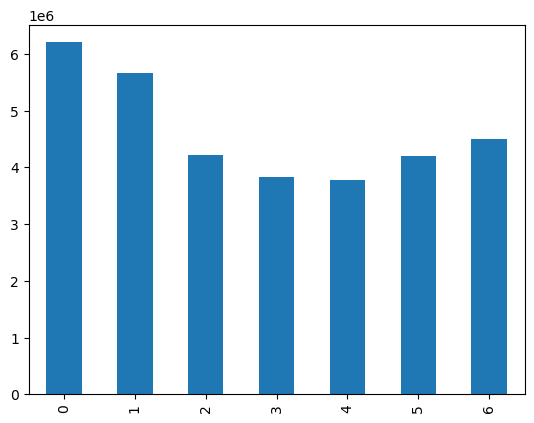

In [11]:
# creating bar chart sorted by index
bar_ords_by_weekday = df_all['order_day_of_week'].value_counts().sort_index().plot.bar()

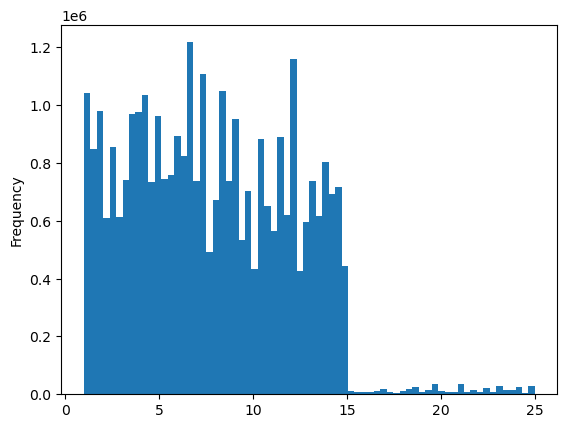

In [12]:
# creating histogram
hist = df_all['prices'].plot.hist(bins = 70)

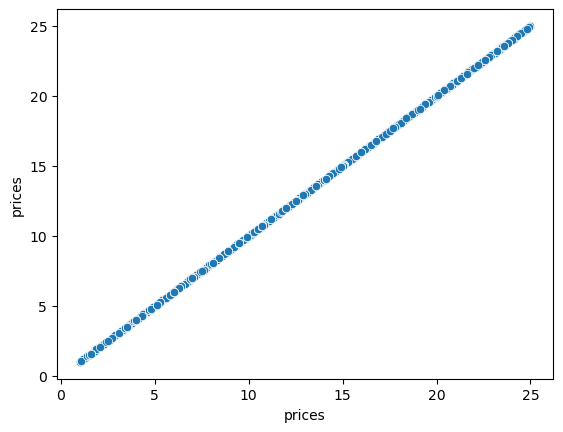

In [13]:
# Creating a Scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df_all)

In [14]:
# Reducing small Sample more for visualization 
small_redux = small[['order_day_of_week','prices']]

In [15]:
#check
small_redux.head(2)

,order_day_of_week,prices
0,2,9.0
2,3,9.0


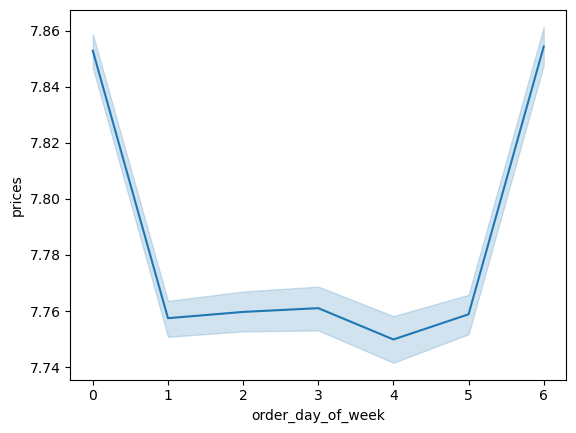

In [16]:
# Create Line Chart for small sample for oder dow and prices
line = sns.lineplot(data = small_redux, x = 'order_day_of_week',y = 'prices')

Exporting Results

In [17]:
# Export bar chart
bar_ords_by_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_dow.png'))

In [19]:
# Export histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_freq.png'))

In [21]:
# Export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [22]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_sum_prices_by_dow.png'))

### C. Visual Analysis - Orders by Hour of the Day

Text(0.5, 1.0, 'Order Frequency by Hour of the Day')

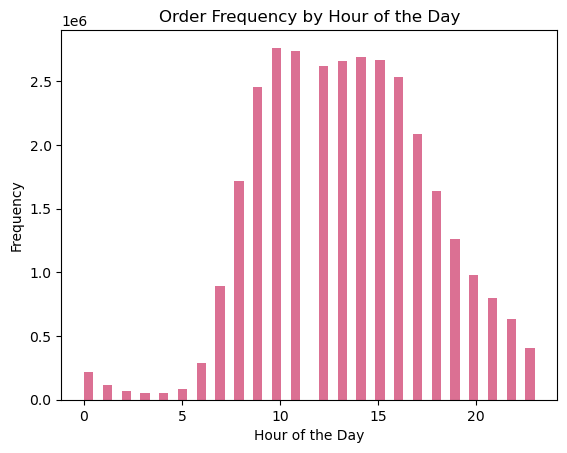

In [17]:
# creating histogram
hist_hod = df_all['order_hour_of_day'].plot.hist(bins = 48, color = 'palevioletred')
plt.xlabel('Hour of the Day')
plt.title('Order Frequency by Hour of the Day')

The order frequency increses rapidly from 6 am until it reaches it's peak at 10 am. The frequency stays stable until 15 pm and rapidly declines afterwards until it reaches it's lowest point at 3 am

In [18]:
# Export histogram 
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_freq_by_hod.png'))

### D. Visual Analysis - Order Distribution by Customer Loyalty

Text(0.5, 1.0, 'Order Distribution by Customer Loyalty')

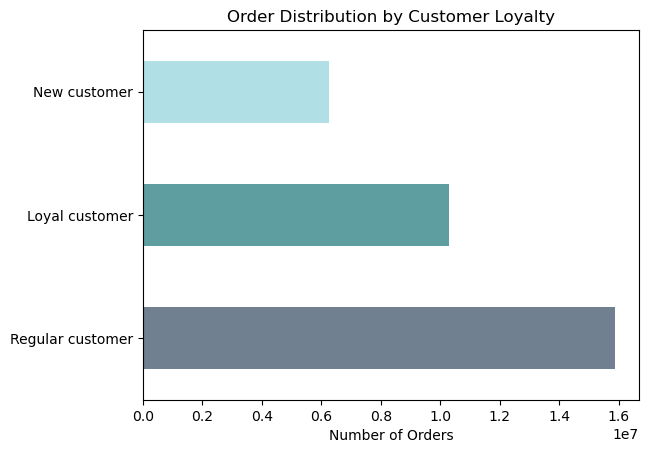

In [39]:
# creating bar chart 
bar_ords_loyalty = df_all['loyalty_flag'].value_counts().plot.barh(color = ['slategray', 'cadetblue', 'powderblue'])
plt.xlabel('Number of Orders')
plt.title('Order Distribution by Customer Loyalty')

Most orders are placed by regular customers.
    
    Loyalty Flag conditions
    no. of orders > 40 = Loyal Customer
    no. of orders <= 40 and > 10 = Regular Customer
    no. of orders <= 10 = New Customer

In [40]:
# Export visualization
bar_ords_loyalty.figure.savefig(os.path.join( path, '04 Analysis','Visualizations', 'bar_ords_by_loyalty.png'))

### E. Visual Analysis - Price of Orders by Hour of the Day

In [19]:
# Reducing small Sample more for visualization
small_redux2 = small[['order_hour_of_day','prices']]

In [20]:
#check
small_redux2.head(2)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0


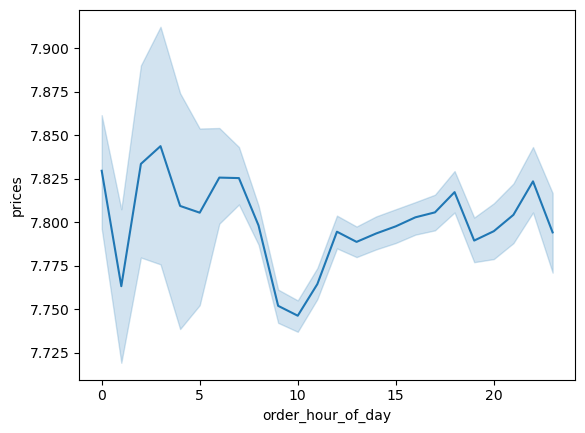

In [51]:
# Create Line Chart for small sample for oder dow and prices
line_prices_by_hod = sns.lineplot(data = small_redux2, x = 'order_hour_of_day',y = 'prices')

Customers seem to spend more on orders during the early morning hours (1am to around 6am). The lowest price per orders seem to occur around 10am after which they start to rise before slighty dipping and rising again until around 11pm from which the prices per order fall until 1am.

In [57]:
# Export visualization
line_prices_by_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_per_order_by_hod.png'))

### F. Visual Analysis - Customer Demographics

In [60]:
# Reducing small Sample more for visualization
small_redux3 = small[['age','no_of_dependants']]

In [61]:
small_redux3.head(2)

,age,no_of_dependants
0,31,3
2,31,3


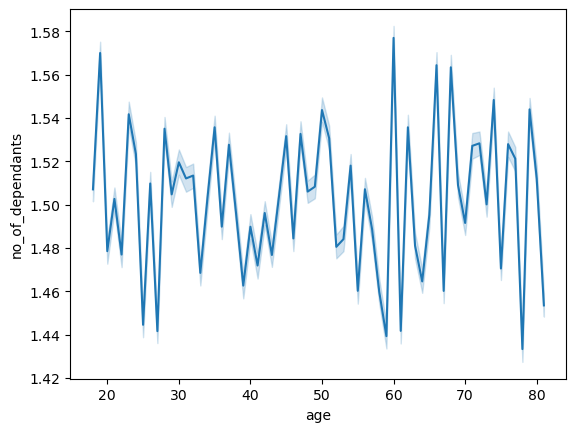

In [62]:
# Create Line Chart for small sample for age and marital status
line_age_dependants = sns.lineplot(data = small_redux3, x = 'age',y = 'no_of_dependants')

There is no clear trend between age and number of dependants noticeable. 

In [63]:
# Export visualization
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

### G. Visual Analysis - Customer Age and Income

In [65]:
# Reducing small Sample more for visualization
small_redux4 = small[['age','income']]

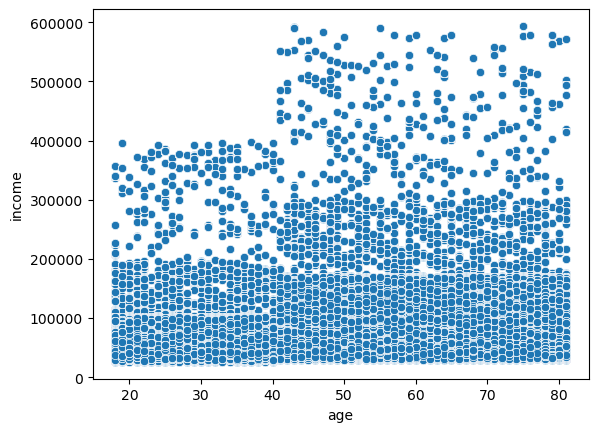

In [66]:
# Creating a Scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = small_redux4)

In [70]:
# checking for min age
small_redux4['age'].min()

18

In [71]:
# checking for max age
small_redux4['age'].max()

81

### Observations
   - All throughout the ages, the distribution of customers with an income under 200k is somewhat even. A slight dip down is visible from the age of 40 on.
   - There are only a few customers under 40 that have an income between 200k to 300k, as opposed to customers over 40, where there is a large concentration of customers.
   - There are no customers under 40 that have an income larger than 400k. 
   - The number of customers under 40 with an income of 300kto 400k seems to be slighty higher than the number of customers under 40 with 200k to 300k income.
   - The income of customers over the age of 40 reaches up to 600k.
   - In conclusion: 
       - Majority of customers have an income under 200k. There is a large segment of customers over 40 that have an income between 200k to 300k.

In [67]:
# Export visualization
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))